In [213]:
%reload_ext autoreload

%autoreload 2

from model import *
import functools as ft
import matplotlib.pyplot as plt
from skimage.io import imsave

In [273]:
latent_dim = 9
TAXICAB    = ft.partial(np.linalg.norm, axis=0, ord=1)
EUCLIDEAN  = ft.partial(np.linalg.norm, axis=0, ord=2)
norm       = ft.partial(np.linalg.norm, axis=0, ord=-2)
norm       = EUCLIDEAN


c = Config( net_size = 50
          , num_dense = 3
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = "tanh"
          , norm = norm
          )
m = build_model(c)

In [274]:
z = np.random.normal(0, 1, size=c.latent_dim)
print(f"z: {z}")

z: [-0.10920775  0.58352746 -0.550186   -0.473392   -0.04568035  0.14471086
 -0.38939602 -1.08604645  0.18561516]


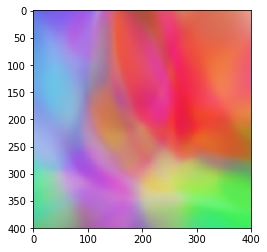

In [275]:
size = 400
width  = size
height = size

yys = forward(c, m, z, width, height)

ys = stitch_together(yys)
plt.imshow(ys.reshape((size, size, c.colours)))

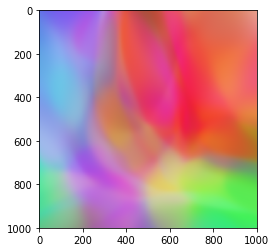

In [281]:
size = 2000
width  = size
height = size

yys = forward(c, m, z, width, height)

ys = stitch_together(yys)
ys = ys.reshape((size, size, c.colours))
plt.imshow(ys)

In [280]:
imsave("s.png", ys)

/home/noon/tools/miniconda3/envs/cppn-3d/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
